In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

mpl.rc('font', family='serif', size=16)

# Set random seed
np.random.seed(0)

In [84]:
# Load data
iris = load_iris()

# Create pandas dataframe with feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [85]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [86]:
# From these four variables we want to predict the species of the iris
# Lets add a new column with the species names to the dataframe
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [87]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
# We now separate a portion of the data for training and testing use
# Here is a quick way to assign 75% of the data as training via new column
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.75 

In [89]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [90]:
# We now split the dataframes into a test and training dataset
train, test = df[df['is_train']==True], df[df['is_train']==False]
print 'Number of observations in the training data:', len(train)
print 'Number of observations in the test data:',len(test)

Number of observations in the training data: 112
Number of observations in the test data: 38


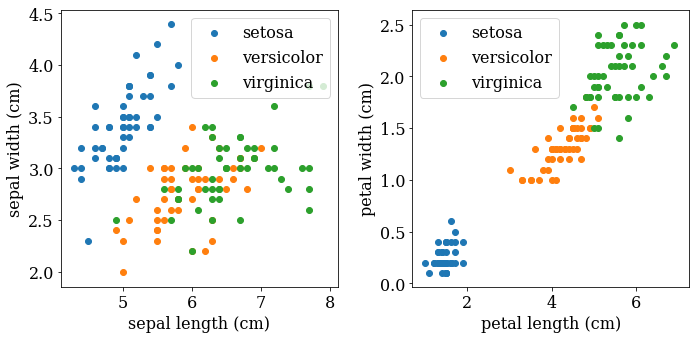

In [91]:
# Before we start preprocessing and training, lets plot the orginal data

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

for species in iris.target_names:
    species_data = df[df['species']==species]
    ax1.scatter(species_data['sepal length (cm)'], 
                species_data['sepal width (cm)'],
                label=species)
    ax2.scatter(species_data['petal length (cm)'], 
               species_data['petal width (cm)'],
               label=species)

ax1.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)') 
ax2.set(xlabel='petal length (cm)', ylabel='petal width (cm)')    
ax1.legend(loc='best')
ax2.legend(loc='best')
fig.tight_layout()

In [108]:
coordinates = df.columns[:5]

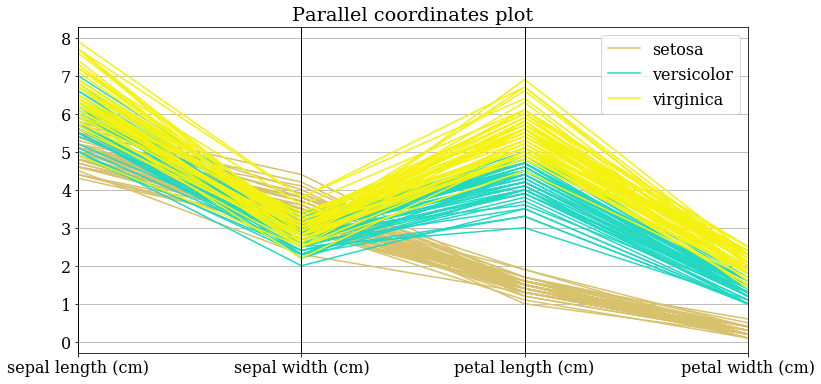

In [109]:
from pandas.plotting import parallel_coordinates

fig, ax = plt.subplots(1,1, figsize=(12,6))

parallel_coordinates(df[coordinates], 'species')

ax.set_title('Parallel coordinates plot')

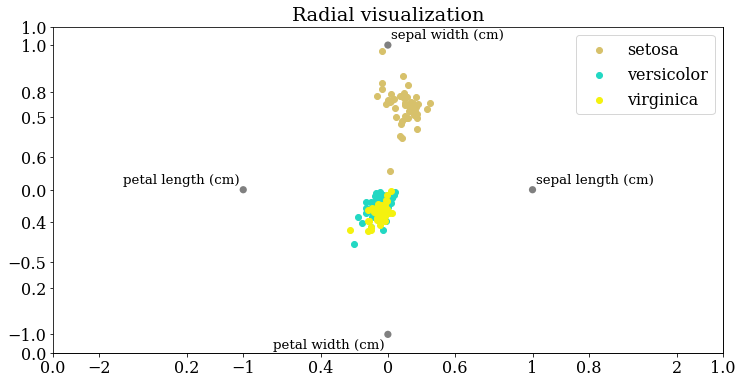

In [110]:
from pandas.plotting import radviz

fig, ax = plt.subplots(1,1, figsize=(12,6))

radviz(df[coordinates], 'species')

ax.set_title('Radial visualization')

In [43]:
# Data preprocessing
features = df.columns[:4]
features

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)'],
      dtype='object')

In [59]:
# train['species'] has the "true" species names
# in order to compare later it needs to be coded into integers (0, 1, 2)

y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [60]:
# Now we train the random forest
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(train[features], y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [61]:
# Apply the classifier to the test data
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
# View predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ]])

In [64]:
# Convert planet species back to English
preds = iris.target_names[clf.predict(test[features])]

print preds[0:5] # Predicted
print test['species'].head() # Actual

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]


In [65]:
# Display how well the classifier did via a confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [66]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('sepal length (cm)', 0.11185992930506346),
 ('sepal width (cm)', 0.016341813006098178),
 ('petal length (cm)', 0.36439533040889194),
 ('petal width (cm)', 0.5074029272799464)]